In [ ]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'telco-customer-churn:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F13996%2F18858%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240608%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240608T202538Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3cb8b33934482eda57b54bd6dd328f13056dde590cda0df7648bd9c51f3bac5e1b1d07e7c23bb0a44680da1f4aa9bf6b56bfdd8758786f205b883ad7e30b7b81675f4eaa3dd25a49295f5b14b3b1676f173020047dd639b83f2752709d563c3e923a3139ce11bd1727229985628a4838a1f2f7215d66f67584468f0183322c28a4f5f633decd8543e9733c9ed72990e057a08b4ef84207f3d3906ec76e69da40687357203238c2f03a27435a58c25d03b3a9d312616a99246bc7c0388bb7df18a869ac078555bf4e495e431b2749e595673a032038c278742503e0ff9825da32c04e32f43376f43c1ec057658af9bc940782043f9102e451ed80c0fcd19ac69b'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 175758 bytes downloaded
Downloaded and uncompressed: telco-customer-churn
Data source import complete.


In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
df=pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [ ]:
df.head(15)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df["MultipleLines"]=df["MultipleLines"].apply(lambda x:'No' if x=='No phone service' else x)
df[["OnlineSecurity","TechSupport","StreamingTV","StreamingMovies","DeviceProtection"]]=df[["OnlineSecurity","TechSupport","StreamingTV","StreamingMovies","DeviceProtection"]].applymap(lambda x:'No' if x=='No internet service' else x)

In [ ]:
df.head(67)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0526-SXDJP,Male,0,Yes,No,72,No,No,DSL,Yes,...,Yes,No,No,No,Two year,No,Bank transfer (automatic),42.10,2962,No
63,0557-ASKVU,Female,0,Yes,Yes,18,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,Yes,Credit card (automatic),54.40,957.1,No
64,5698-BQJOH,Female,0,No,No,9,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,94.40,857.25,Yes
65,5122-CYFXA,Female,0,No,No,3,Yes,No,DSL,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,75.30,244.1,No


In [ ]:
df_for_encoding=df.drop(['customerID'],axis=1)
df_for_encoding.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df_for_encoding.columns:
  df_for_encoding[col]=le.fit_transform(df_for_encoding[col])
df_for_encoding.head(20)



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,1,2,0,0,0,0,0,1,3,436,157,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,266,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1
5,0,0,0,0,8,1,1,1,0,0,1,0,1,1,0,1,2,1274,6104,1
6,1,0,0,1,22,1,1,1,0,2,0,0,1,0,0,1,1,1075,1550,0
7,0,0,0,0,10,0,0,0,1,0,0,0,0,0,0,0,3,140,2609,0
8,0,0,1,0,28,1,1,1,0,0,1,1,1,1,0,1,2,1371,2646,1
9,1,0,0,1,62,1,0,0,1,2,0,0,0,0,1,0,0,482,3022,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Churn', ylabel='count'>

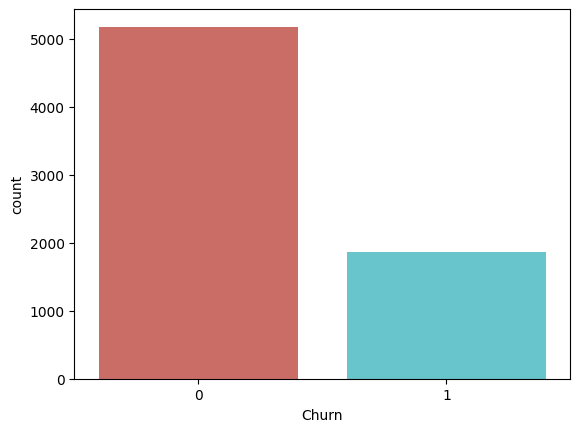

In [ ]:
sns.countplot(x='Churn',data=df_for_encoding,palette='hls')

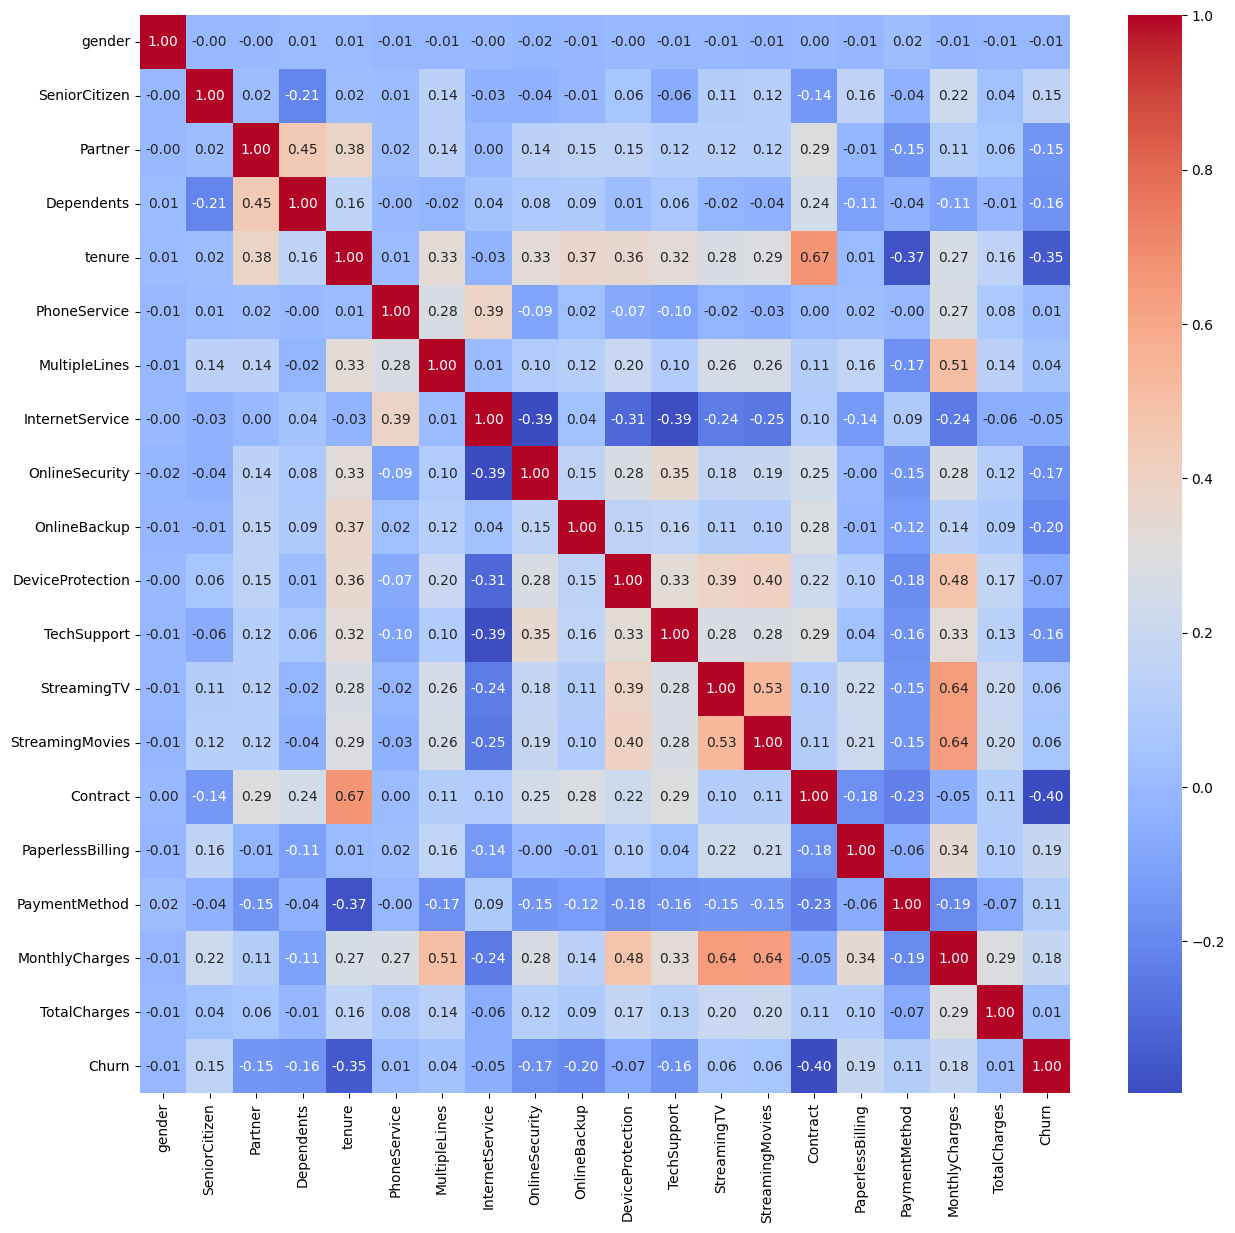

In [ ]:

corelation_matrix=df_for_encoding.corr()
plt.figure(figsize=(15,14))
sns.heatmap(corelation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.show()



In [ ]:
df_final=df_for_encoding.drop(["StreamingTV","gender"],axis=1)

In [ ]:
x=df_final.drop(columns=["Churn"],axis=1)
y=df_final["Churn"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train_sc=scalar.fit_transform(x_train)
x_test_sc=scalar.transform(x_test)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=17)
x_train_pca=pca.fit_transform(x_train_sc)
x_test_pca=pca.transform(x_test_sc)

In [ ]:
import numpy as np
np.sum(pca.explained_variance_ratio_)

0.9999999999999998

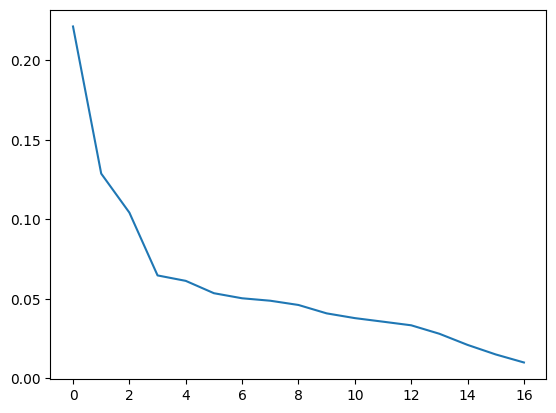

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(0,17), pca.explained_variance_ratio_)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)
y_predict=logistic_model.predict(x_test)
logistic_regression_accu = metrics.accuracy_score(y_test,y_predict)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# precision =precision_score(y_test, y_predict,average=None)
# print('Precision score: ',precision)
# recall = recall_score(y_test, y_predict,average=None)
# print('\nrecall score: ',recall)
# f1 = f1_score(y_test, y_predict,average=None)
# print('F1 score: ',f1)

report = classification_report(y_test, y_predict)
print('classification_report\n',report)


classification_report
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [ ]:
print(logistic_regression_accu)

0.8161816891412349


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
SEED = 23

gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.04,
                                 random_state=100,
                                 max_features=5 )

gbc.fit(x_train, y_train)

y_pred = gbc.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print("Gradient Boosting Classifier accuracy is :", acc)

Gradient Boosting Classifier accuracy is : 0.8133427963094393


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

smote_enn = SMOTEENN()
X_resampled, y_resampled = smote_enn.fit_resample(x, y)

X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

evaluation_results = []

model_hyperparams = [
    ('Random Forest', RandomForestClassifier(random_state=42),
     {'model__n_estimators': [50, 100, 200], 'model__max_depth': [None, 10, 20]}),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
     {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.05, 0.1, 0.5]}),
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
     {'model__C': [0.1, 1, 10], 'model__penalty': ['l1', 'l2']}),
    ('K-Nearest Neighbors', KNeighborsClassifier(),
     {'model__n_neighbors': [3, 5, 7], 'model__weights': ['uniform', 'distance']}),
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
     {'model__max_depth': [None, 10, 20], 'model__min_samples_split': [2, 5, 10]}),
    ('Naive Bayes', GaussianNB(), {})
]

optimal_model = None
highest_accuracy = 0.0

for model_name, model_instance, hyperparams in model_hyperparams:
    model_pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', model_instance)
    ])

    if hyperparams:
        grid_search = GridSearchCV(model_pipeline, hyperparams, cv=2)
        grid_search.fit(X_train_res, y_train_res)
        model_pipeline = grid_search.best_estimator_

    model_pipeline.fit(X_train_res, y_train_res)

    predictions = model_pipeline.predict(X_test_res)

    accuracy = accuracy_score(y_test_res, predictions)

    evaluation_results.append({'Model': model_name, 'Accuracy': accuracy})

    print(f"Model: {model_name}")
    print(f"Test Accuracy: {accuracy:.3f}%\n")

    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        optimal_model = model_pipeline

results_df = pd.DataFrame(evaluation_results)
print("Best Model:")
print(f"Test Accuracy: {highest_accuracy}")
print(f"Model Pipeline: {optimal_model} with accuracy {highest_accuracy:.2f}%")


Model: Random Forest
Test Accuracy: 0.936%

Model: Gradient Boosting
Test Accuracy: 0.938%

Model: Logistic Regression
Test Accuracy: 0.903%

Model: K-Nearest Neighbors
Test Accuracy: 0.884%

Model: Decision Tree
Test Accuracy: 0.915%

Model: Naive Bayes
Test Accuracy: 0.858%

Best Model:
Test Accuracy: 0.9379310344827586
Model Pipeline: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 GradientBoostingClassifier(n_estimators=200,
                                            random_state=42))]) with accuracy 0.94%


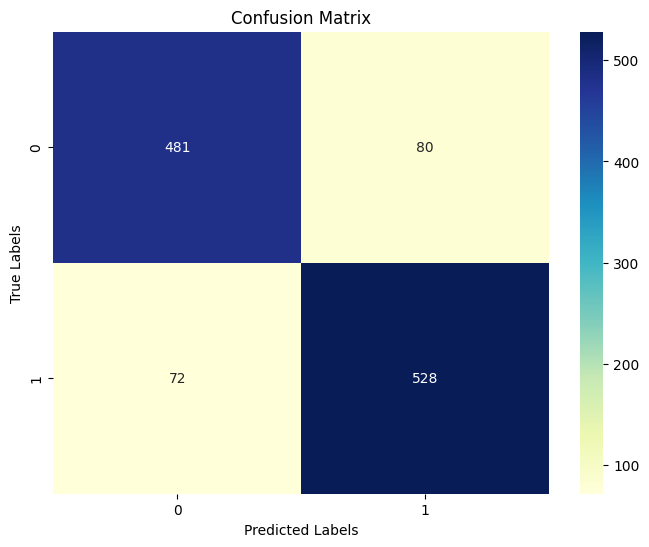

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()